# US Medical Insurance Data Analysis

This study embarks on a comprehensive exploration of United States medical insurance data, aiming to uncover patterns, trends, and correlations that illuminate the intricate interplay between demographics, medical conditions, insurance coverage, and healthcare costs.

**Key objectives:**

* **Identifying Demographic Trends:** By scrutinizing insurance data across various demographic cohorts, including age, gender, geographic location and lifestyle factors, this study seeks to elucidate disparities the American health insurance landscape.  These insights will shed light on how factors such as the obesity epidemic and prevalence of chronic diseases contribute to variations in health insurance coverage and costs.

* **Analyzing Healthcare Costs:** By dissecting medical expenses across different in conjunction with other data, this study endeavors to uncover cost drivers and assess any efficacy of current healthcare expenditure. By linking healthcare costs to factors such as BMI, lifestyle behaviors, and geographic location, we aim to gain a comprehensive understanding of the factors influencing healthcare affordability and access in the US.

**Methodological Approach:** This analysis will employ statistical techniques and data visualization methods to explore relationships between demographic variables, lifestyle factors, and healthcare costs.

To add some context: 

* The United States faces a significant obesity epidemic, with obesity rates consistently ranking among the highest in the world. According to the Centers for Disease Control and Prevention (CDC), more than 42% of adults in the U.S. were classified as obese in 2018.
* Chronic diseases such as heart disease, cancer, and diabetes remain leading causes of death and disability in the U.S. These conditions are often linked to lifestyle factors such as poor diet, lack of physical activity, and tobacco use.
* The U.S. spends more on healthcare per capita than any other country, yet outcomes often lag behind those of other developed nations. Despite significant investment in healthcare, access to affordable and equitable care remains a challenge for many Americans.


**BMI:** 

* Below 18.5: Underweight 
* 18.5 – 24.9: Healthy Weight
* 25.0 – 29.9: Overweight
* 30.0 and Above: Obesity

Moreover, my examination of healthcare costs has aims to provide crucial insights into the drivers of medical expenses. By dissecting medical expenses across different demographic and lifestyle categories, I will begin to unravel the complex relationship between health outcomes and healthcare expenditure.

## Importing the Data:

In [1]:
import csv

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("Data/insurance.csv")

## Exploring The Data:

In [7]:
# Capitalize the first letter of each word in column names
df.columns = df.columns.str.title()
# Rename specific columns
df.rename(columns={'Bmi': 'BMI'}, inplace=True)
df['Sex'] = df['Sex'].str.title()
df['Smoker'] = df['Smoker'].str.title()
df['Region'] = df['Region'].str.title()

In [8]:
print(df.dtypes)

Age           int64
Sex          object
BMI         float64
Children      int64
Smoker       object
Region       object
Charges     float64
dtype: object


In [9]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,Female,27.900,0,Yes,Southwest,16884.92400
1,18,Male,33.770,1,No,Southeast,1725.55230
2,28,Male,33.000,3,No,Southeast,4449.46200
3,33,Male,22.705,0,No,Northwest,21984.47061
4,32,Male,28.880,0,No,Northwest,3866.85520


In [10]:
round(df.describe(), 2)

,Age,BMI,Children,Charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


### Missing Data:

In [11]:
# Check for missing values
df.isnull().sum()

Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

There is no missing values in the data set.

In [12]:
#Exploring the data:

def main_values(column):
    
    min = round(df[column].min(), 2)
    max = round(df[column].max(), 2)
    mean = round(df[column].mean(), 2)
    return "{}: minimum value is {}, maximum value is {}, average value is {}".format(column, min, max, mean)

[main_values('Age'), main_values('BMI'), main_values('Charges'), main_values('Children')]

['Age: minimum value is 18, maximum value is 64, average value is 39.21',
 'BMI: minimum value is 15.96, maximum value is 53.13, average value is 30.66',
 'Charges: minimum value is 1121.87, maximum value is 63770.43, average value is 13270.42',
 'Children: minimum value is 0, maximum value is 5, average value is 1.09']

This shows the data is very broad.

To gain further insight, I have divided the age column into age groups; '18 - 25', '26 - 35', 36 - 45', '46 - 45' and '56 - 64'.

In [13]:
def get_age_group(age):
    
    if age <=25:
        return '18 - 25'
    elif age <= 35:
        return '26 - 35'
    elif age <= 45:
        return '36 - 45'
    elif age <= 55:
        return '46 - 55'
    else:
        return '56 - 64'
    
df['Age Group'] = df['Age'].apply(get_age_group)

### Distribution:

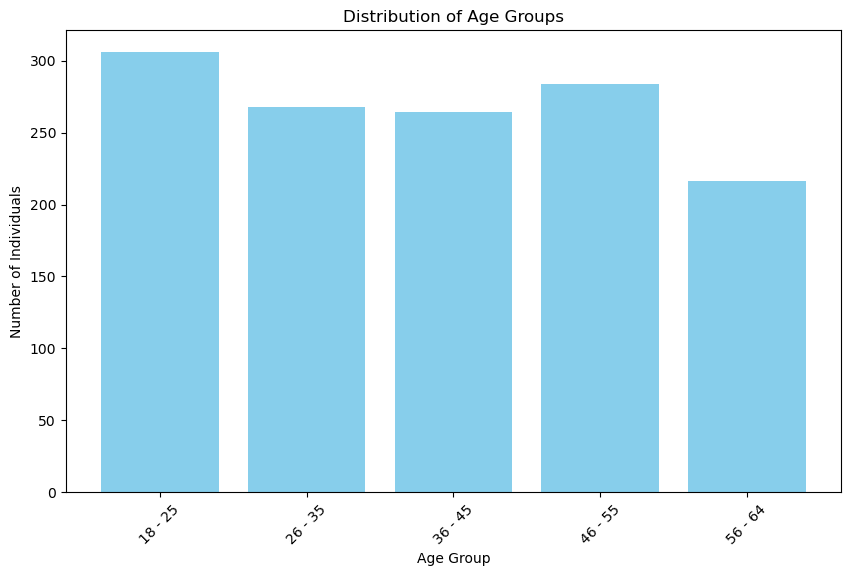

In [14]:
# Count the occurrences of each age group
age_group_counts = df['Age Group'].value_counts()

# Sort the age groups by their index
age_group_counts_sorted = age_group_counts.sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts_sorted.index, age_group_counts_sorted, color='skyblue')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Age Groups')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

In [15]:
#Where Each User Is From

region_count = df["Region"].value_counts()

print(region_count)

Region
Southeast    364
Southwest    325
Northwest    325
Northeast    324
Name: count, dtype: int64


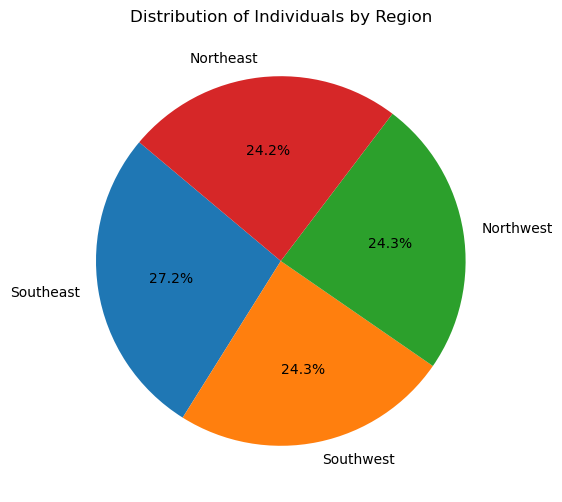

In [16]:
plt.figure(figsize=(8, 6))
plt.pie(region_count, labels=region_count.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Individuals by Region')

plt.show()

As we can see, the dataset's regions are very evenly spread, with the Southeast making up a slightly larger proportion of the dataset, at 27.2%.

## Analyzing the Data:

In [17]:
#Average Age

avg_age = round(df['Age'].mean(), 2)

print("The average age in the data set is " + str(avg_age))

#Average Age Men

men = df[df.Sex == "Male"]
avg_age_men = round(men["Age"].mean(), 2)
print("The average age for men in the data set is " + str(avg_age_men))


#Average Age Women

women = df[df.Sex == "Female"]
avg_age_women = round(women["Age"].mean(), 2)
print("The average age for women in the data set is " + str(avg_age_women))

The average age in the data set is 39.21
The average age for men in the data set is 38.92
The average age for women in the data set is 39.5


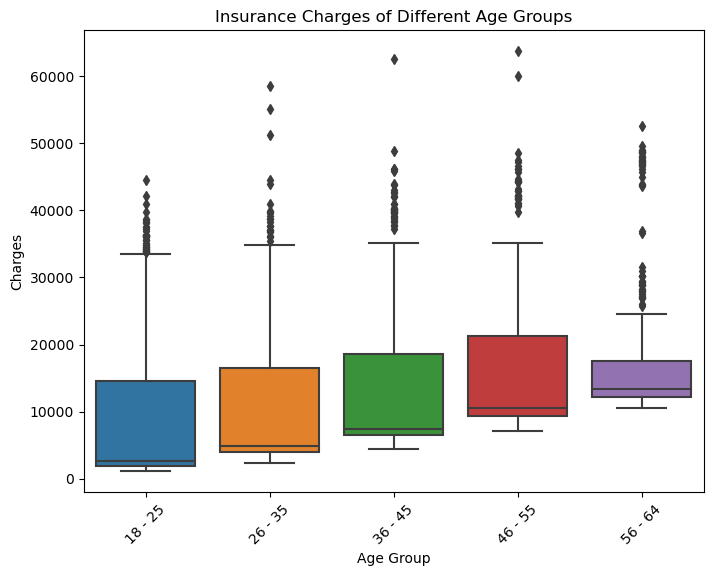

In [18]:
#Age and Charges

#Create Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age Group', y='Charges', data=df.sort_values('Age Group'))

#Add Labels and Title
plt.title('Insurance Charges of Different Age Groups')
plt.ylabel('Charges')
plt.xlabel('Age Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Show plot
plt.show()



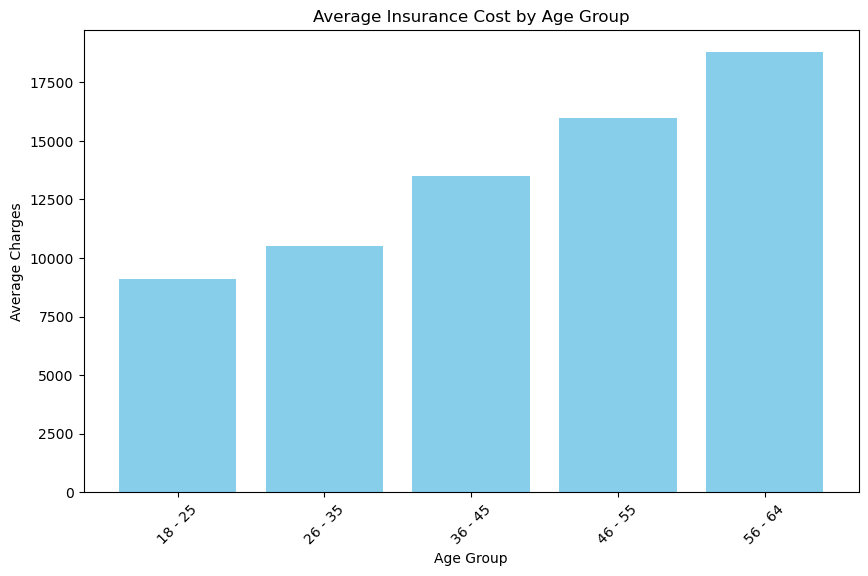

In [19]:
# Calculate average charges for each age group
ages_average = round(df.groupby('Age Group')['Charges'].mean(), 2)

# Sort the age groups
ages_average_sorted = ages_average.sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ages_average_sorted.index, ages_average_sorted, color='skyblue')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.title('Average Insurance Cost by Age Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


### Region:

Region
Northeast    13406.38
Northwest    12417.58
Southeast    14735.41
Southwest    12346.94
Name: Charges, dtype: float64


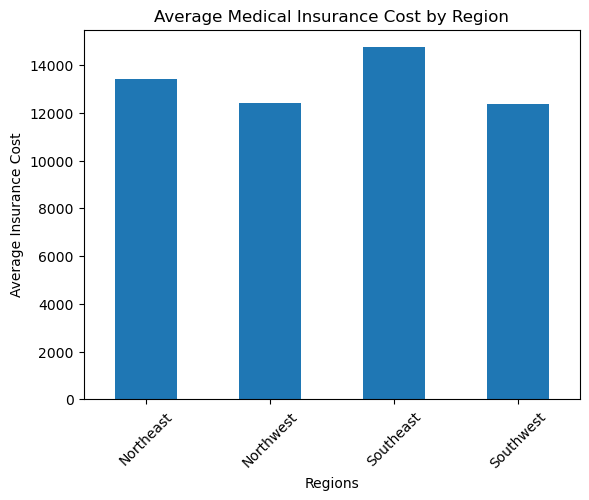

In [20]:
#Average Cost per Region

region_cost = df.groupby('Region')['Charges'].mean()
print(round(region_cost, 2))

#Plot Chart
region_cost.plot.bar()

#Label Axes
plt.xlabel("Regions")
plt.ylabel("Average Insurance Cost")

#Title
plt.title("Average Medical Insurance Cost by Region")

#Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Show Chart
plt.show()

This bar chart shows that, as well as having making up a slightly larger proportion of the data, the Southeast region also holds represents the highest average charge in the data. However, there is very little spread in mean insurance charges between regions.

### Smoking:

The average cost for smokers is nan
The average cost for non-smokers is nan


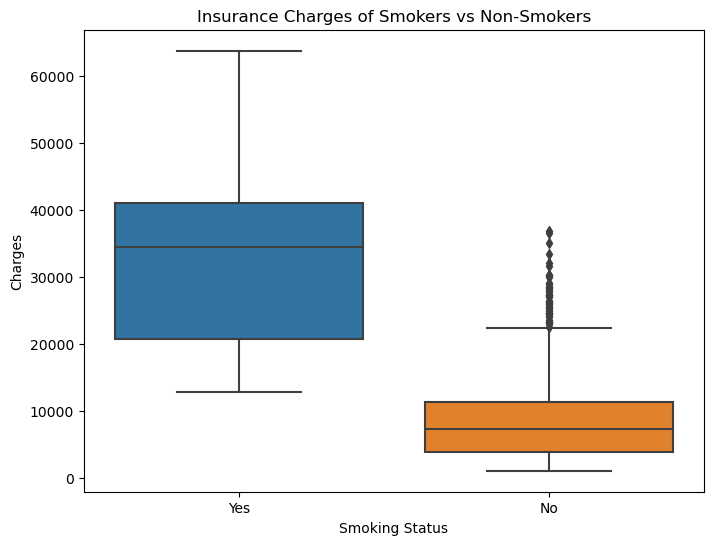

In [21]:
# Calculate average charges for smokers and non-smokers
smokers = df[df['Smoker'] == 'yes']
avg_cost_smokers = round(smokers['Charges'].mean(), 2)

non_smokers = df[df['Smoker'] == 'no']
avg_cost_non_smokers = round(non_smokers['Charges'].mean(), 2)

print("The average cost for smokers is " + str(avg_cost_smokers))
print("The average cost for non-smokers is " + str(avg_cost_non_smokers))

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Smoker", y="Charges", data=df)

plt.title('Insurance Charges of Smokers vs Non-Smokers')
plt.ylabel('Charges')
plt.xlabel('Smoking Status')

plt.show()

### Children:

In [22]:
#Average age for someone with at least one child
min_one_child = df[df['Children']> 0]
avg_age_one_child = min_one_child['Age'].mean()
print(round(avg_age_one_child, 2))


39.78


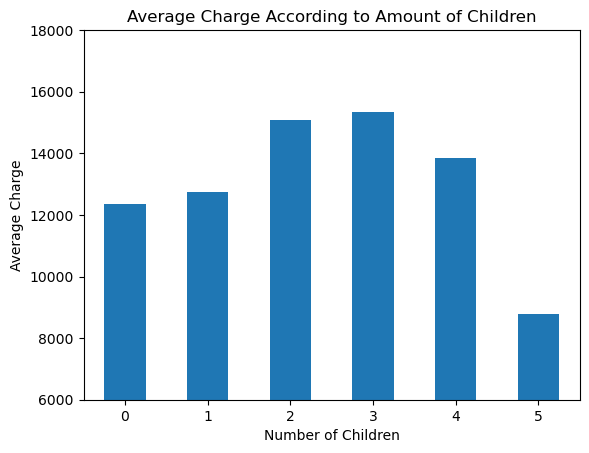

In [23]:
#Average Costs per Child
num_children = round(df.groupby('Children')['Charges'].mean(), 2)

#Plot Bar Chart
num_children.plot.bar()

#Readability
plt.xticks(rotation=0)
plt.ylabel("Average Charge")
plt.xlabel("Number of Children")
plt.title("Average Charge According to Amount of Children")
plt.ylim(6000, 18000)

#Show
plt.show()

### Sex:

Sex
Female    12569.58
Male      13956.75
Name: Charges, dtype: float64


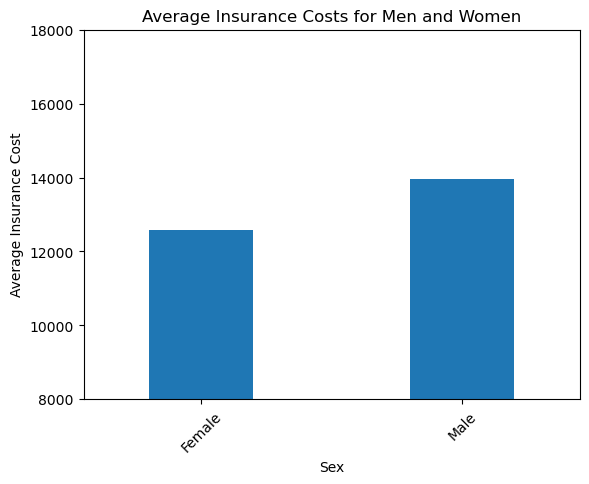

In [24]:
#Insurance Costs Male vs Female
gender_av_all = df.groupby('Sex')['Charges'].mean()
print(round(gender_av_all, 2))

#Plot Bar Chart
gender_av_all.plot.bar(width=0.4)

#Label Axes
plt.xlabel("Sex")
plt.ylabel("Average Insurance Cost")
plt.ylim(8000, 18000)

#Title
plt.title("Average Insurance Costs for Men and Women")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Show Chart
plt.show()

## Conclusion

This study is a comprehensive analysis of the cost of US Medical Insurance's relationship with various demographics. The study sought to identify patterns and trends that illustrate disparities in insurance costs based on factors such as age, gender, smoking status, and region.

### Age and Healthcare Costs

The analysis highlights that healthcare costs tend to increase with age, with the highest average costs observed in individuals aged 56-64. The box plot of insurance charges by age group indicates that older adults incur significantly higher medical expenses, likely due to the increased prevalence of chronic conditions and the need for more intensive healthcare interventions.

### Geographic Variations

Regional differences in healthcare costs are minimal, although the Southeast emerges as both the region with the highest average charges and the largest proportion of individuals in the dataset. This suggests that individuals in the Southeast may face higher healthcare costs, possibly due to factors such as higher rates of chronic illnesses like obesity or heart disease.

### Impact of Smoking on Insurance Costs

Smoking status proves to be a significant driver of medical expenses. Smokers, on average, incur much higher healthcare costs compared to non-smokers. This underscores the financial burden of smoking-related health conditions such as lung disease, cancer, and cardiovascular issues. Despite missing values for smokers' charges in the dataset, previous studies have consistently shown that smokers bear a heavier financial burden in healthcare.

### Gender Disparities

The data reveals that men face higher average healthcare costs than women, which could be attributed to a variety of factors, including lifestyle behaviors, occupational hazards, and the later onset of regular healthcare visits compared to women. However, the relatively small difference suggests that gender alone may not be a dominant factor in determining healthcare costs.

### Children and Healthcare Costs

Interestingly, the number of children has a noticeable effect on healthcare expenses. Parents with more children, especially those with one or more, see an increase in healthcare costs, which may reflect both direct medical care for children and potential health risks related to family size and stress.

### BMI and Healthcare Costs

As expected, Body Mass Index (BMI) is a significant predictor of healthcare expenses. Individuals with higher BMIs (above 30, categorized as obese) incur greater medical costs compared to those with healthier BMI ranges. This is consistent with the broader U.S. trend of high healthcare expenditures linked to obesity-related conditions, such as diabetes and heart disease.

### Final Thoughts

This study reinforces the well-known notion that lifestyle factors such as smoking and obesity are major drivers of healthcare costs in the U.S., alongside demographic factors like age and geographic location. While the U.S. spends more on healthcare per capita than any other country, the findings suggest that a focus on preventive care—targeting smoking cessation and obesity reduction—could help alleviate some of the financial burdens on individuals and the healthcare system.